# Imports:

In [258]:
from bs4 import BeautifulSoup
import requests
import pandas as pd


# Web-Scraping:

In [259]:
all_year_outputs = []


start_year = int(input('Starting season (from 2003 onwards): '))
end_year = int(input('Ending season (from 2003 onwards): '))
top_n_players = int(input('Top how many players (select any number between 1-50, for better plots recommended 10 or under): '))

# Scraping ESPN deportes website
for n in range(start_year, end_year+1):
    response = requests.get(
        f"https://espndeportes.espn.com/futbol/estadisticas/_/liga/ESP.1/temporada/{n}/vista/anotaciones")
    soup = BeautifulSoup(response.text, 'html.parser')

    yearly_outputs = []

    for items in soup.select_one(".Table tbody").find_all('tr'):
        name = items.find_all("td")[1].getText()
        team = items.find_all("td")[2].getText()
        games_played = int(items.find_all("td")[3].getText())
        goals_scored = int(items.find_all("td")[4].getText())
        yearly_outputs.append([n, name, team, games_played, goals_scored])

    topN_yearly = yearly_outputs[0:(top_n_players)]
    for data_line in range(0, (top_n_players)):
        all_year_outputs.append(topN_yearly[data_line])


Starting season (from 2003 onwards): 2006
Ending season (from 2003 onwards): 2018
Top how many players (select any number between 1-50, for better plots recommended 10 or under): 10



# Data Frame creation and editing:

In [260]:
df = pd.DataFrame(all_year_outputs, columns=['year', 'player', 'team', 'games played', 'goals scored'])

df.head(top_n_players+1)

,year,player,team,games played,goals scored
0,2006,Ruud van Nistelrooy,Real Madrid,37,25
1,2006,Diego Milito,Real Zaragoza,37,23
2,2006,Ronaldinho,Barcelona,32,21
3,2006,Frederic Kanouté,Sevilla FC,32,21
4,2006,Diego Forlán,Villarreal,36,19
5,2006,David Villa,Valencia,36,16
6,2006,Fernando Baiano,Celta Vigo,35,15
7,2006,Raúl Tamudo,Espanyol,31,15
8,2006,Fernando Torres,Atlético Madrid,36,14
9,2006,Lionel Messi,Barcelona,26,14


In [261]:
df['goals per game'] = df['goals scored']/df['games played']

In [262]:
df.at[(df['year']==2015) & (df['player']=='Luis Suárez'), 'games played'] = 35
df.at[(df['year']==2015) & (df['player']=='Luis Suárez'), 'goals scored'] = 40

df.at[(df['year']==2015) & (df['player']=='Cristiano Ronaldo'), 'games played'] = 36
df.at[(df['year']==2015) & (df['player']=='Cristiano Ronaldo'), 'goals scored'] = 35

df.at[(df['year']==2015) & (df['player']=='Lionel Messi'), 'games played'] = 33
df.at[(df['year']==2015) & (df['player']=='Lionel Messi'), 'goals scored'] = 26

df.at[(df['year']==2015) & (df['player']=='Neymar'), 'games played'] = 34
df.at[(df['year']==2015) & (df['player']=='Neymar'), 'goals scored'] = 24

df.at[(df['year']==2015) & (df['player']=='Karim Benzema'), 'games played'] = 27
df.at[(df['year']==2015) & (df['player']=='Karim Benzema'), 'goals scored'] = 24

df.at[(df['year']==2015) & (df['player']=='Antoine Griezmann'), 'games played'] = 38
df.at[(df['year']==2015) & (df['player']=='Antoine Griezmann'), 'goals scored'] = 22

df.at[(df['year']==2015) & (df['player']=='Aritz Aduriz'), 'games played'] = 34
df.at[(df['year']==2015) & (df['player']=='Aritz Aduriz'), 'goals scored'] = 20

df.at[(df['year']==2015) & (df['player']=='Rubén Castro'), 'games played'] = 38
df.at[(df['year']==2015) & (df['player']=='Rubén Castro'), 'goals scored'] = 19

df.at[(df['year']==2015) & (df['player']=='Gareth Bale'), 'games played'] = 23
df.at[(df['year']==2015) & (df['player']=='Gareth Bale'), 'goals scored'] = 19

df.at[(df['year']==2015) & (df['player']=='Borja Bastón'), 'games played'] = 36
df.at[(df['year']==2015) & (df['player']=='Borja Bastón'), 'goals scored'] = 18

df.drop(df[df['games played']>39].index, inplace = True)

In [263]:
df.loc[df['year']==2015]

,year,player,team,games played,goals scored,goals per game
90,2015,Luis Suárez,Barcelona,35,40,1.14
91,2015,Cristiano Ronaldo,Real Madrid,36,35,0.97
92,2015,Lionel Messi,Barcelona,33,26,0.79
93,2015,Neymar,Barcelona,34,24,0.71
94,2015,Karim Benzema,Real Madrid,27,24,0.89
95,2015,Antoine Griezmann,Atlético Madrid,38,22,0.58
96,2015,Aritz Aduriz,Athletic Club,34,20,0.59
97,2015,Rubén Castro,Real Betis,38,19,0.50
98,2015,Gareth Bale,Real Madrid,23,19,0.83
99,2015,Borja Bastón,Eibar,36,18,0.50


In [265]:
df.head(20)

,year,player,team,games played,goals scored,goals per game
0,2006,Ruud van Nistelrooy,Real Madrid,37,25,0.68
1,2006,Diego Milito,Real Zaragoza,37,23,0.62
2,2006,Ronaldinho,Barcelona,32,21,0.66
3,2006,Frederic Kanouté,Sevilla FC,32,21,0.66
4,2006,Diego Forlán,Villarreal,36,19,0.53
5,2006,David Villa,Valencia,36,16,0.44
6,2006,Fernando Baiano,Celta Vigo,35,15,0.43
7,2006,Raúl Tamudo,Espanyol,31,15,0.48
8,2006,Fernando Torres,Atlético Madrid,36,14,0.39
9,2006,Lionel Messi,Barcelona,26,14,0.54


In [266]:
df.shape

(130, 6)




# Plots:

In [267]:
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [268]:
pd.options.display.float_format = '{:,.2f}'.format

In [269]:
print(f'Any NaN values among the data? {df.isna().values.any()}')

Any NaN values among the data? False


In [270]:
l_chart = px.line(df,
                  x='year', 
                  y='goals scored',
                  color='year',
                  hover_name='player',
                  title=f'Top {top_n_players} goalscorers La Liga from {start_year} to {end_year}',
                 markers = True
                 )

l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Goals per season')

l_chart.show()

In [271]:
top_teams = df.team.value_counts()[:10]
top_teams.sort_values(ascending=True, inplace=True)
top_teams

Real Zaragoza       3
Real Betis          4
Celta Vigo          5
Espanyol            5
Valencia            8
Athletic Club       8
Sevilla FC          9
Atlético Madrid    15
Barcelona          27
Real Madrid        27
Name: team, dtype: int64

In [272]:
org_bar = px.bar(x = top_teams.values,
                 y = top_teams.index,
                 orientation='h',
                 color=top_teams.values,
                 color_continuous_scale=px.colors.sequential.haline,
                 title=f"Amount of times a club's player appears in the top {top_n_players} <br>season goalscorers. <br> Top 10 Spanish clubs ({start_year}-{end_year}):")

org_bar.update_layout(xaxis_title='Number of Prizes', 
                      yaxis_title='Institution',
                      coloraxis_showscale=False)
org_bar.show()

In [273]:
# Box plot using plotly instead
box = px.box(df, 
             x='year', 
             y='goals scored',
             title=f'How many goals did the top {top_n_players} score <br> ({start_year}-{end_year})')

box.update_layout(xaxis_title='Year',
                  yaxis_title='Goals in a season',
                  xaxis={'categoryorder':'mean ascending'},)

box.show()

In [274]:
team_player_goals = df.groupby(by=['team', 'player', 'year' 
                                       ], as_index=False).agg({'goals scored': pd.Series.sum})

team_player_goals = team_player_goals.sort_values('goals scored', ascending=False)
team_player_goals


,team,player,year,goals scored
31,Barcelona,Lionel Messi,2011,50
81,Real Madrid,Cristiano Ronaldo,2014,48
32,Barcelona,Lionel Messi,2012,46
78,Real Madrid,Cristiano Ronaldo,2011,46
34,Barcelona,Lionel Messi,2014,43
...,...,...,...,...
1,Athletic Club,Aritz Aduriz,2012,14
68,Málaga,Salomón Rondón,2010,14
69,Málaga,Sandro Ramírez,2016,14
58,Espanyol,Gerard Moreno,2016,13


In [275]:
burst = px.sunburst(team_player_goals, 
                    path=['team', 'player'], 
                    values='goals scored',
                    title=f'In what team are players in the top {top_n_players} goalscorers at? <br> Data from season {start_year} to {end_year}',
                    width=850,
                    height=850
                   )

burst.update_layout(xaxis_title='Goals Scored', 
                    yaxis_title='Team',
                    coloraxis_showscale=False)

burst.show()

In [276]:
burst = px.sunburst(team_player_goals, 
                    path=['team', 'year', 'player'], 
                    values='goals scored',
                    title=f'In what team are players in the top {top_n_players} goalscorers at? <br> Data from season {start_year} to {end_year}',
                    width=1500,
                    height=1500
                   )

burst.update_layout(xaxis_title='Goals Scored', 
                    yaxis_title='Team',
                    coloraxis_showscale=False)

burst.show()

In [284]:
moving_average = df.rolling(window=top_n_players*2).mean()

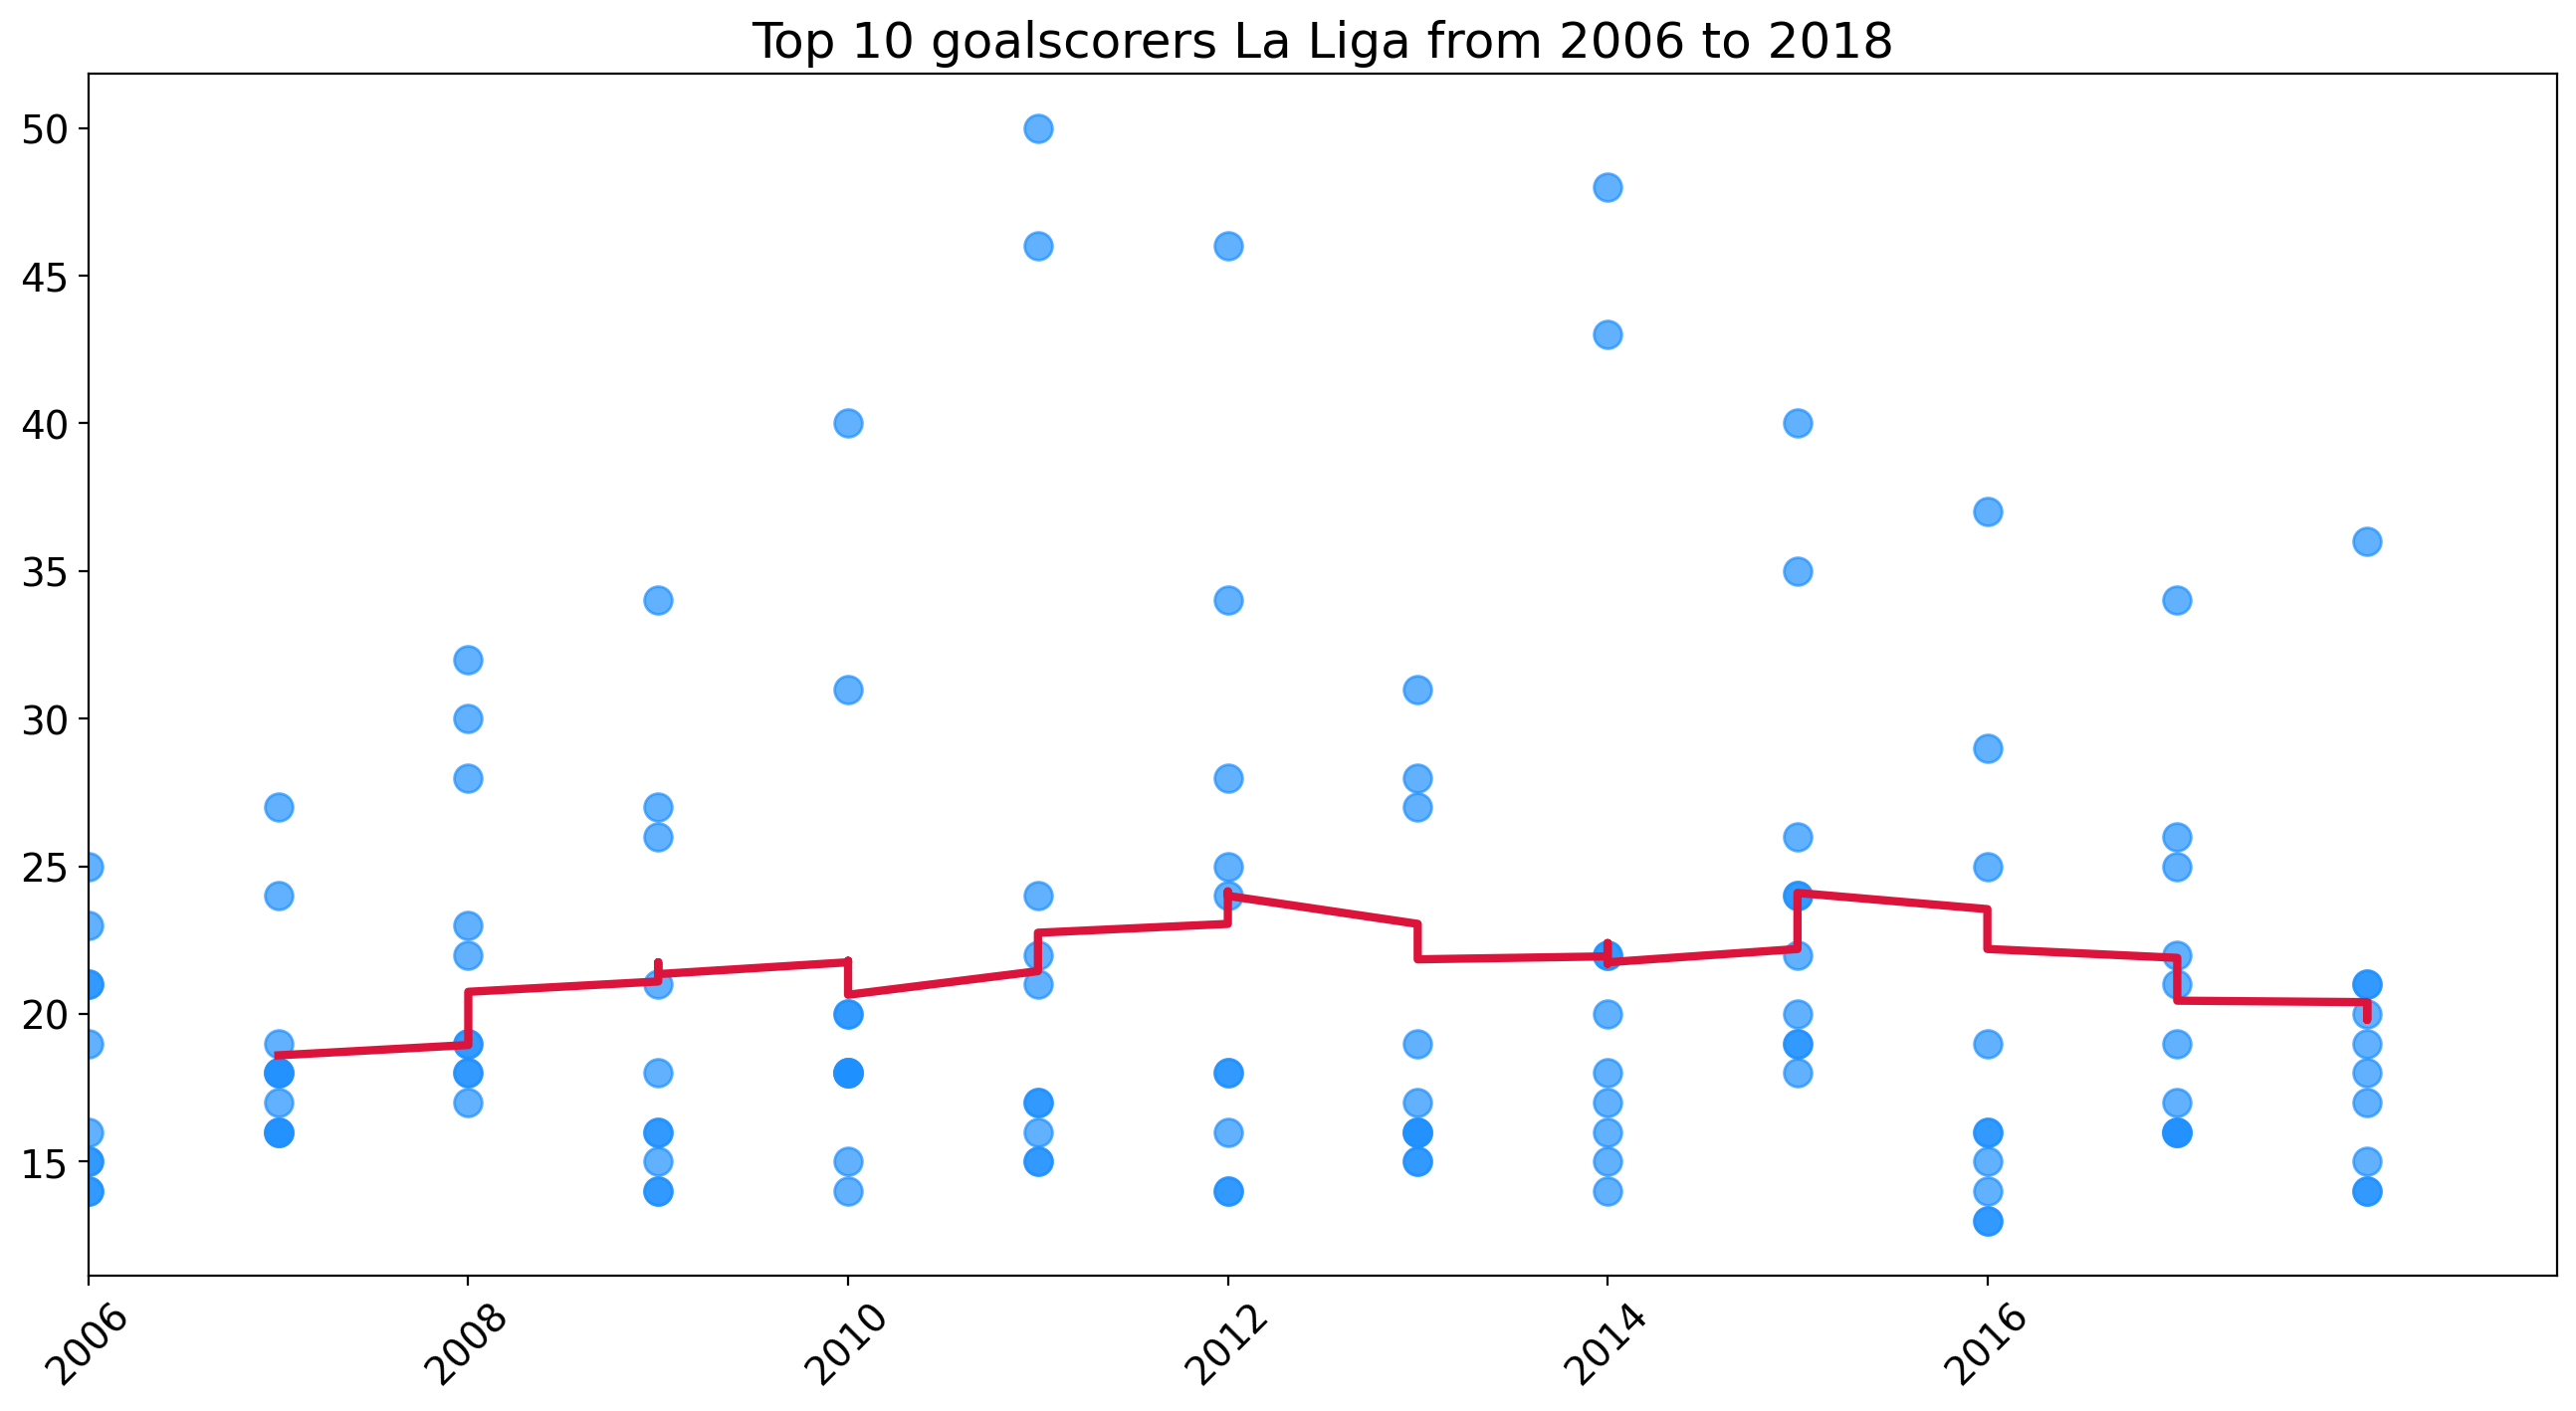

In [285]:
plt.figure(figsize=(16,8), dpi=200)
plt.title(f'Top {top_n_players} goalscorers La Liga from {start_year} to {end_year}', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(start_year, end_year, step=2), 
           fontsize=14, 
           rotation=45)

ax = plt.gca()
ax.set_xlim(start_year, end_year+1)

ax.scatter(x=df.year, 
           y=df['goals scored'], 
           c='dodgerblue',
           alpha=0.7,
           s=100,)

ax.plot(df.year, 
        moving_average['goals scored'], 
        c='crimson', 
        linewidth=3,)

plt.show()

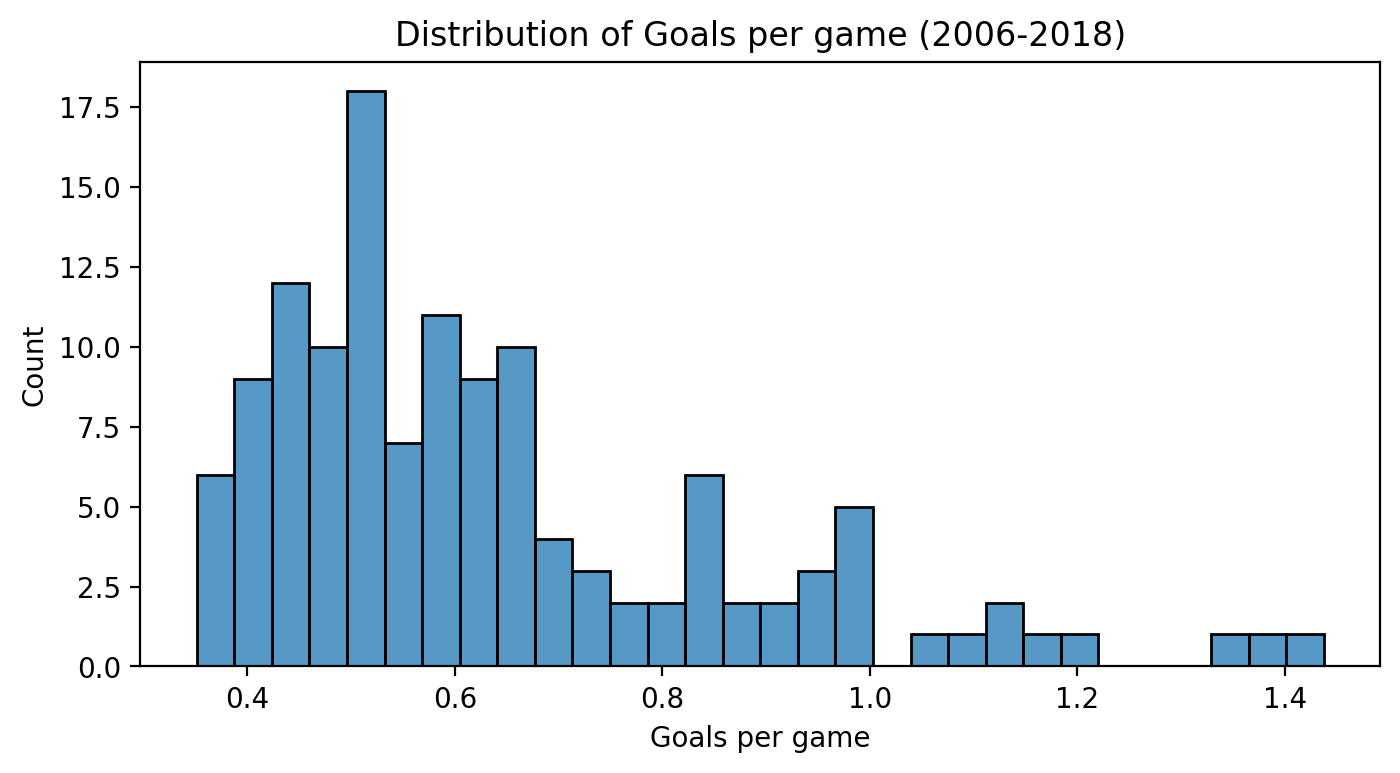

In [279]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=df,
             x=df['goals per game'],
             bins=30)
plt.xlabel('Goals per game')
plt.title(f"Distribution of Goals per game ({start_year}-{end_year})")
plt.show()